# A4 - Probability distributions
Probability and Statistics<br>
Name(s): Hanh Hoang, Roni Nuutinen<br>
Date: 15 Nov 2023<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy.random as rng

# Problem 1. Birth weight

In this first problem we study babies' birth weight data, which has used for [a machine learning competition at Kaggle](https://www.kaggle.com/competitions/birth-weight-prediction/data). Your aim is to analyse the data and compare it against the normal distribution.

## 1.1. Descriptive analysis of the dataset

- Read in the dataset using pandas read_csv function. Remember to store the dataset into same folder where this Notebook is.
- Select the `BWEIGHT` for more detailed analysis.
- Create a histogram of the birth weight data.
- Calculate also the descriptive statistics.

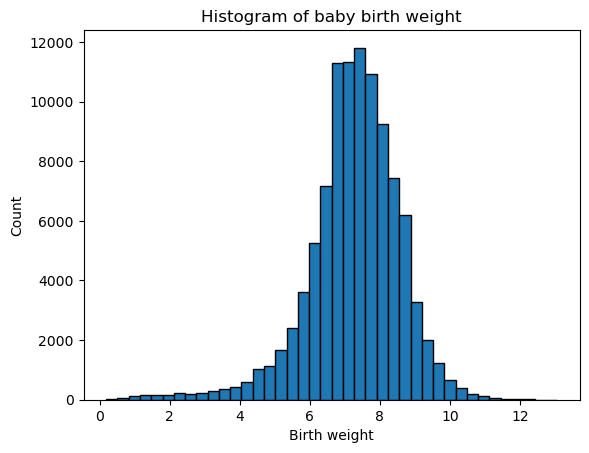

count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64

In [3]:
# Your code
data = pd.read_csv('baby-weights-dataset.csv')
bweight = data['BWEIGHT']

#Histogram of birth weight data
plt.hist(bweight, bins =40, edgecolor = 'black')
plt.xlabel('Birth weight')
plt.ylabel('Count')
plt.title('Histogram of baby birth weight')
plt.show()

#Descriptive statistics
bweight.describe()


**Questions**

- a) How many babies there were in this dataset?
- b) What was the average ($\mu$) of the birth weight?
- c) What was the standard deviation ($\sigma$) of the birth weight?
- d) What were the minimum and maximum values for the birth weight?
- e) What do you think are the units for the birth weight? Explain.

**Answers**

- a) There're 101400 babies in dataset 
- b) The average of birth weight: 7.258066 
- c) Standard deviation of birth weight: 1.329461
- d) Minimum of birth weight: 0.187500. Maximum of birth weight: 13.062500
- e) The units for birth weight could be pound. According to statistics, the maximum weight of baby is 13. If it's 13kg it's unrational, so pound is more rational for baby's weight. 

## 1.2. Calculations

Using the birth weight data, calculate:
- f) What is the probability that the birth weight is less than 4?
- g) What is the probability that the birth weight is more than 10?
- h) What is the probability that the birth weight is between $\mu - 2\sigma$ and $\mu + 2\sigma$?

In [3]:
p_less_than4 = (bweight < 4).sum()/bweight.shape[0]
print(f"Probability that bweight is less than 4: {p_less_than4:.5f}")
p_more_than10 = (bweight > 10).sum()/bweight.shape[0]
print(f"Probability that bweight is more than 10: {p_more_than10:.5f}")
lim1 = bweight.mean() - 2* bweight.std()
lim2 = bweight.mean() + 2* bweight.std()
p3 = sum(bweight.between(lim1, lim2))/bweight.count()
print(f"Probability between the range: {p3:.5f}")

Probability that bweight is less than 4: 0.02259
Probability that bweight is more than 10: 0.00975
Probability between the range: 0.95179


**Answers**

- f) Probability that birth weight is less than 4: 2.25%
- g) Probability that birth weight is more than 10: 0.97%
- h) Probability that birth weight is between a range: 95.17%

## 1.3. Generate random numbers based on statistics

Based on the descriptive statistics generate random numbers from normal distribution. Use the same mean, standard deviation, and size (=count) as calculated from the data.

Calculate the descriptive statistics for the generated data. Make also a histogram.

- i) Compare the generated random number results to the original. What do you observe? Similarities? Differences?
- k) How would you describe the distribution of the birth weight?


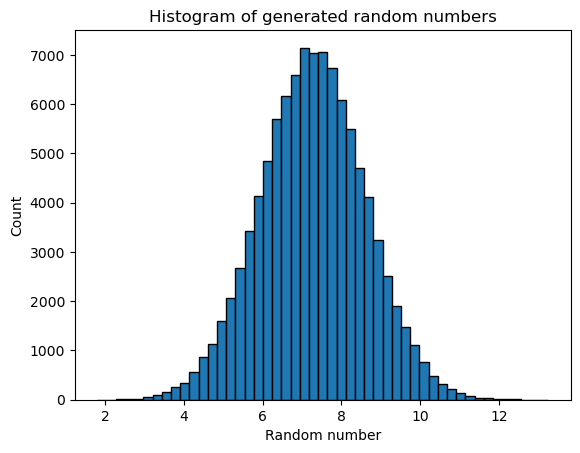

Generated random number descriptive statistics:
count    101400.000000
mean          7.266306
std           1.328335
min           1.842441
25%           6.372527
50%           7.270039
75%           8.161337
max          13.257175
dtype: float64
Birth weight descriptive statistics:
count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64


In [28]:
# Your code
mean = bweight.mean()
std = bweight.std()
rand = rng.default_rng(12345)
x = rand.normal(mean, std, bweight.count())
plt.hist(x, bins = np.linspace(1.8, 13.25, 50), edgecolor = 'black')
plt.xlabel('Random number')
plt.ylabel('Count')
plt.title('Histogram of generated random numbers')
plt.show()
d_random = pd.Series(x).describe()
d1 = bweight.describe()
print(f"Generated random number descriptive statistics:")
print(d_random)
print(f"Birth weight descriptive statistics:")
print(d1)

**Answer:**

- i) The two sets are similar in their general shape, though different in two ways: 1. the random dataset lacks premature births, lacking the anomalous "low value-slope"; 2. the "real" data shows stronger regression to the mean, as well as two anomalous "spikes" outside its gaussian shape.
- k) The given dataset shows a relatively consistent gaussian shape, with the exceptions of the modest slope of low values -- probably due to premature births -- as well as some anomalous spikes outside the general gaussian shape.

---
# Problem 2. Arrival times

The aim of this problem is to learn to use [exponential distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html). We use the values given in YouTube video **[Example distribution](https://www.youtube.com/watch?v=4PEX-SuftjQ)**.

**Coding**
- Create an array of 2 000 [exponentially distributed](https://en.wikipedia.org/wiki/Exponential_distribution) random numbers having the parameter value $\lambda$ given in the Youtube video.
- Draw a histogram of the values. (Remember to tune the bin settings properly).
- Draw also a boxplot of the values.
- Calculate the descriptive statistics for the data.
- Calculate the probability that the data value is between 2 and 4.


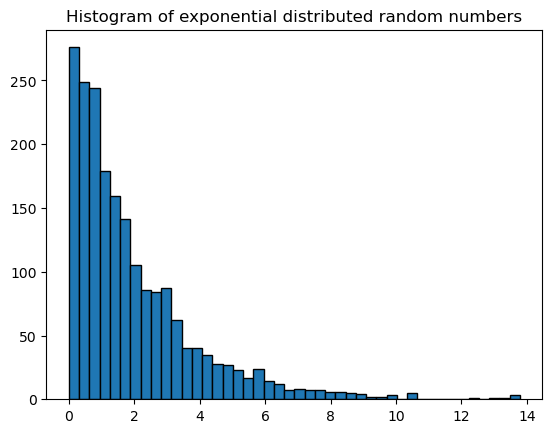

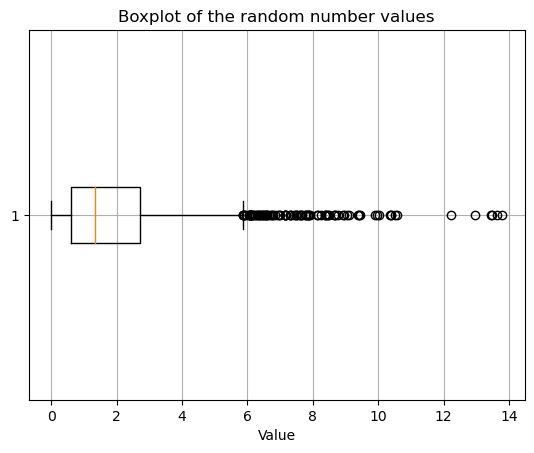

Descriptive statistics of exponential distributed random values:
count    2000.000000
mean        1.956256
std         1.950545
min         0.000971
25%         0.597710
50%         1.335319
75%         2.707381
max        13.783568
dtype: float64

Probability that data is between 2 and 4 is 0.2285
Median: 1.33532
Interquatile range: 2.10967


In [27]:
# Your code
#2000 exponential distributed random values histogram
lam = 1/2
scale = 1/lam
sample_size = 2000
rand = rng.default_rng(12345)
x_expo = rand.exponential(scale, sample_size)
plt.hist(x_expo, bins = np.linspace(x_expo.min(), x_expo.max(), 45), edgecolor = 'black')
plt.title('Histogram of exponential distributed random numbers')
plt.show()

#Boxplot of birth weight
plt.boxplot(x_expo, vert = False)
plt.title('Boxplot of the random number values')
plt.xlabel('Value')
plt.grid()
plt.show()

#Descriptive statistics for exponential distributed random value data
d_exponential = pd.Series(x_expo).describe()
print("Descriptive statistics of exponential distributed random values:")
print(d_exponential)

#Calculate probability that data value is between 2 and 4
in_range = (x_expo > 2) & (x_expo < 4)
p4 = sum(in_range)/sample_size

print(f"\nProbability that data is between 2 and 4 is {p4}")
print(f"Median: {np.median(x_expo):.5f}")
print(f"Interquatile range: {(np.quantile(x_expo, .75) - np.quantile(x_expo, .25)):.5f}")

**Questions:**
- a) What is the value for $\lambda$?
- b) What does the variable x present (in video)?
- c) What is the median value calculated from the array? How much does it differ from the analytical (calculated with paper and pen) value given in video?
- d) What is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) for this data?
- e) How much do the analytical probability $P(2 < x < 4)$ (see again the video) and the probability calculated from the array differ? Explain why.

**Answers:**

- a) Lambda = 1/2
- b) The variable x is minutes in graph
- c) Median value: 1.3352. The median value from the video is 1.3863. There's not much difference between 2 values: 1.3863-1.3352 = 0.0511
- d) Interquartile range: 2.10967.
- e) Probability P(2<x<4) calculated from the array differ is approximately 0.2285. Probability from the video 0.2325. The video uses time continuous value and probability we generated is used random generated to get certain data (discrete value)

---
# Problem 3. Comparing distributions

In this last problem we compare [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) to [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution).

**Coding:**

- Generate 10,000 random numbers from the *Poisson distribution* having mean value of 50.
- Calculate the descriptive statistics for the generated dataset.
- Then, generate another 10,000 random numbers from the *normal distribution* having the same mean and standard deviation as for the Poisson distribution.
- Calculate also the descriptive statistics for this second dataset.
- Draw histograms for both generated dataset (Poisson and normal distributions). Use same bins settings for both histograms.

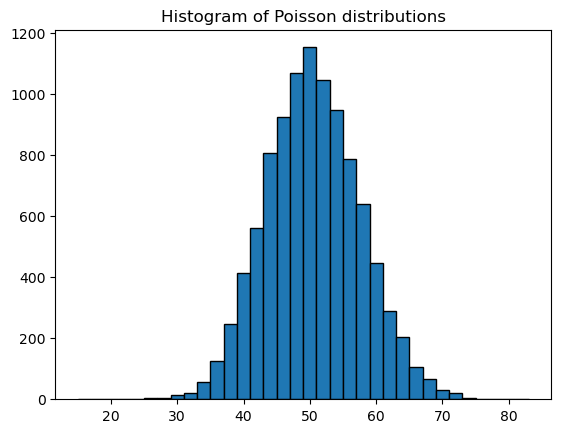

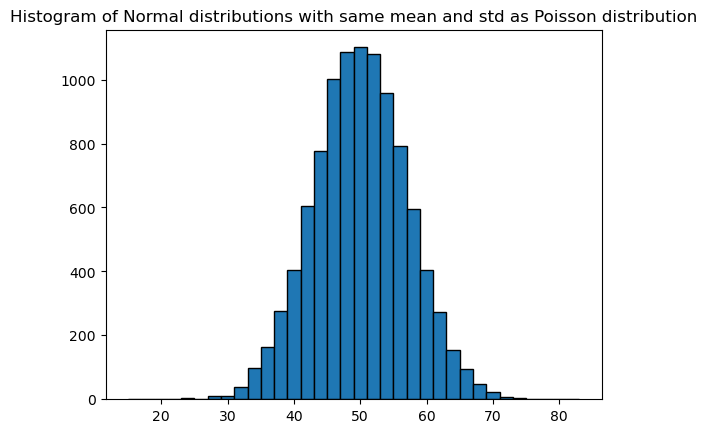

Descriptive statistics of Poisson distribution:
count    10000.000000
mean        50.002300
std          7.107556
min         23.000000
25%         45.000000
50%         50.000000
75%         55.000000
max         82.000000
dtype: float64

Descriptive statistics of Normal distribution:
count    10000.000000
mean        49.990034
std          7.042136
min         23.087296
25%         45.263816
50%         49.952640
75%         54.737324
max         77.845303
dtype: float64


In [6]:
# Your code
# 10,000 random numbers from Possion distribut8ion having mean value of 50
lam = 50
size = 10000
x_pois = rand.poisson(lam, size)
#Histogram of Poisson distribution
plt.hist(x_pois, bins = np.arange(15, 85, 2), edgecolor = 'black')
plt.title('Histogram of Poisson distributions')
plt.show()

#10000 random numbers from Normal distribution having same mean and std as Poisson distribution
x_n = rand.normal(x_pois.mean(), x_pois.std(), size)
plt.hist(x_n, bins = np.arange(15, 85, 2) , edgecolor = 'black')
plt.title('Histogram of Normal distributions with same mean and std as Poisson distribution')
plt.show()

#Descriptive Statistics
d_pois = pd.Series(x_pois).describe()
print(f"Descriptive statistics of Poisson distribution:")
print(d_pois)
print()

#Descriptive statistic for normal distribution dataset
d_normal = pd.Series(x_n).describe()
print("Descriptive statistics of Normal distribution:")
print(d_normal)

**Question**

- By comparing the descriptive statistics and histograms, explain the similarities and differences between Poisson and normal distribution.

**Answer**

- we see that the distribution on both histogram is similar, because we used high sample number. The bigger the data sample is the more similar it is between 2 distributions.
From statistics, we noticed that Poisson generates discrete values with mostly interger value, whereas normal generates continuous data with decimals. The difference between Normal and Poisson distribution is very mild,(the difference is in a range of 0.1). They abide the same general shape, but provide different accuracy.